## Data exploration and pre-processing
Basically, for any data analysis or machine learning project the following has to be conducted
- Data gtahering 
- Data assessing 
- Data ceaning 

## Data gathering has been allready done

## Data assessing 
- Assessing is the second and it is assessed to inspect data for two things:
 - **Data quality issues**: Data that has quality issues have issues with content like missing, duplicate, or incorrect data. 
 - **Lack of tidiness**: Data that has specific structural issues

You can search for these issues in two ways:
- Visually by scrolling
- Programmatically using code

for this project I used programmatic Assessment using the following methods 
- .head (DataFrame and Series)
- .tail (DataFrame and Series)
- .sample (DataFrame and Series)
- .info (DataFrame only)
- .describe (DataFrame and Series)
- and other

### some methods associated with quality issue
- .value_counts 
- .duplicates 
- .sort_values 
- sum of .isnull 

In [1]:
# loding liberaries
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import os
import re
import emoji
import nltk
%matplotlib inline

In [11]:
def load_data():
    data=pd.read_csv('cleaned_twitterData_data.csv')
    return data

df = load_data()

In [9]:
df.head(2)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-0.125,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-0.100,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN


In [10]:
# shape info
df.shape

(21997, 15)

In [11]:
# checking against null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   subjectivity        21997 non-null  float64
 4   polarity            21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       21997 non-null  int64  
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  6190 non-null   object 
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

In [23]:
# satitstical information 
df.describe()

,subjectivity,polarity,favorite_count,retweet_count,followers_count,friends_count
count,21997.000000,21997.000000,21997.000000,21997.000000,2.199700e+04,21997.000000
mean,0.283878,0.061334,852.241033,176.768241,1.796985e+04,1563.237305
std,0.290964,0.223716,3106.276392,498.466921,3.030684e+05,4358.923487
min,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,2.000000,2.000000,5.700000e+01,137.000000
50%,0.200000,0.000000,115.000000,38.000000,2.840000e+02,487.000000
75%,0.469048,0.133333,655.000000,187.000000,1.324000e+03,1599.000000
max,1.000000,1.000000,65170.000000,17409.000000,1.449852e+07,208360.000000


In [12]:
# checking null
df.isnull().any().sum()

4

In [13]:
#checking against duplicated observation
df.duplicated().any().sum()

0

In [39]:
## unique value and ther number of appearance in decending orde
df['polarity'].value_counts()

 0.000000    8982
-0.100000     973
 0.133333     782
 0.050000     502
 0.500000     502
             ... 
-0.014773       1
 0.478788       1
 0.059375       1
 0.010000       1
 0.207143       1
Name: polarity, Length: 829, dtype: int64

In [40]:
# number of unique values
df['polarity'].nunique()

829

In [28]:
df['polarity'].sort_values()

15122   -1.0
2909    -1.0
7448    -1.0
15248   -1.0
7920    -1.0
        ... 
21693    1.0
13630    1.0
20442    1.0
20140    1.0
9778     1.0
Name: polarity, Length: 21997, dtype: float64

### Result of the assesmement
- Created_at datatype issue
- missing vaues are there
- the source and original text needs to be cleaned

### Cleaning  
it helps as to solve the following 
- duplicate data
- missing data
- inaccurate data
- incomplete data

In [15]:
# handling with missing values with drop method
df.dropna(inplace = True)

In [42]:
# checking against missing value
df.isnull().any().sum()

0

In [12]:
# habdling created_at datatype
df['created_at'] =pd.to_datetime(df['created_at'])

In [17]:
#checking datatype
df['created_at'].dtype

datetime64[ns, UTC]

### Visualization 

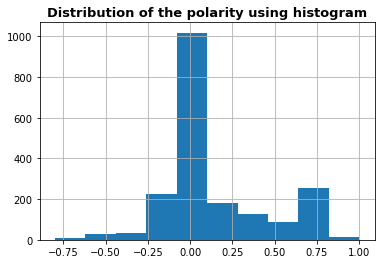

In [19]:
# the plority distribution
df.polarity.hist();
plt.title("Distribution of the polarity using histogram", fontsize = 13, fontweight = 'bold');

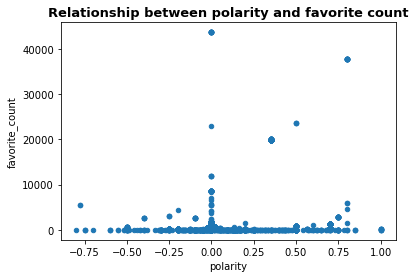

In [20]:
# polarity vs favorite_count using scatter plot
df.plot(x = 'polarity', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between polarity and favorite count", fontsize = 13, fontweight = 'bold');

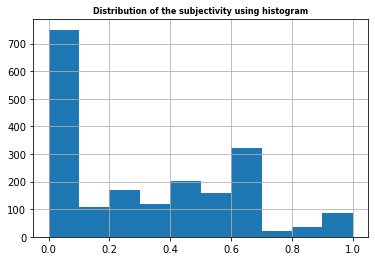

In [21]:
# the distribution of subjectivity
df.subjectivity.hist();
plt.title("Distribution of the subjectivity using histogram", fontsize = 8, fontweight = 'bold');

## Topic Modeling 

In [24]:
#object creation
#DataLoader_obj= df

In [18]:
df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria"


In [13]:
df['clean_text'] = df['original_text']

In [48]:
# checking after addition new column
df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria",RT @benedictrogers: We must not let this happe...


In [49]:
# copying to new datafram
tweets_df = df
#tweets_df

In [50]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Ekubay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [51]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ").replace("...", "") #Remove hashtag sign but keep the text

    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


tweets_df['clean_text'] = tweets_df['original_text'].map(lambda x: cleaner(x))
tweets_df['clean_text']

0        : Extra random image ( I ): focus in one very ...
1        : China ' s media the military for each area o...
2        China even cut off communication , they don ' ...
3        to : I told you my friend , will be a vassal s...
4        : I ’ m sorry , I thought was an independent c...
                               ...                        
21992     : A good of China ' s missile on on August 4th .
21993     : A good of China ' s missile on on August 4th .
21994                                  Thanks smart move .
21995    : people ' s Desire for Unification With China...
21996    : people ' s Desire for Unification With China...
Name: clean_text, Length: 21997, dtype: object

In [52]:
# stop word removal
stop = stopwords.words('english')
tweets_df['clean_text']  = tweets_df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [53]:
tweets_df['clean_text']

0        : Extra random image ( I ): focus one specific...
1           : China ' media military area Strait Read pi …
2        China even cut communication , ' US . But clow...
3        : I told friend , vassal state , , much like m...
4        : I ’ sorry , I thought independent country go...
                               ...                        
21992                : A good China ' missile August 4th .
21993                : A good China ' missile August 4th .
21994                                  Thanks smart move .
21995    : people ' Desire Unification With China Near ...
21996    : people ' Desire Unification With China Near ...
Name: clean_text, Length: 21997, dtype: object

In [41]:
class PrepareData:
  def __init__(self,df):
    self.df=df
  def preprocess_data(self):
    
    #tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]


    return word_list, word_to_id, corpus_1

In [42]:
PrepareData_obj=PrepareData(tweets_df)
#tweets_df['clean_text']
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [44]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [28]:
#print(id_words)

## Topic Modeling using Latent Dirichlet Allocation
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined.

The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet

In [45]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
pprint(lda_model.print_topics())

[(0,
  '0.077*"china" + 0.069*"…" + 0.062*"’" + 0.040*"visit" + 0.037*"military" + '
  '0.033*"island" + 0.022*"august" + 0.019*"us" + 0.016*"said" + '
  '0.015*"around"'),
 (1,
  '0.073*"missile" + 0.067*"a" + 0.047*"good" + 0.042*"4th" + 0.039*"…" + '
  '0.033*"minister" + 0.031*"part" + 0.028*"we" + 0.026*"army" + '
  '0.025*"china"'),
 (2,
  '0.068*"…" + 0.023*"the" + 0.022*"video" + 0.016*"russia" + 0.015*"us" + '
  '0.015*"support" + 0.015*"japan" + 0.014*"watch" + 0.014*"china" + '
  '0.011*"maybe"'),
 (3,
  '0.043*"…" + 0.039*"china" + 0.029*"“" + 0.026*"this" + 0.023*"president" + '
  '0.021*"”" + 0.020*"’" + 0.020*"world" + 0.019*"strait" + 0.017*"national"'),
 (4,
  '0.068*"china" + 0.053*"…" + 0.038*"i" + 0.024*"us" + 0.023*"time" + '
  '0.019*"travel" + 0.019*"dead" + 0.018*"hotel" + 0.018*"found" + '
  '0.016*"speaker"')]


In [46]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('china', 0.06844409),
   ('…', 0.059724513),
   ('military', 0.0538316),
   ('part', 0.028788604),
   ('we', 0.025636911),
   ('country', 0.020418528),
   ('day', 0.018753309),
   ('around', 0.017894005),
   ('🇹🇼', 0.016471209),
   ('thing', 0.01441758)]),
 (1,
  [('china', 0.04950285),
   ('…', 0.046268746),
   ('a', 0.04424097),
   ('missile', 0.038820684),
   ('island', 0.038263634),
   ('good', 0.02545378),
   ('august', 0.023338547),
   ('4th', 0.02224777),
   ('video', 0.020689132),
   ('’', 0.020256594)]),
 (2,
  [('…', 0.07907734),
   ('us', 0.07333916),
   ('visit', 0.07318751),
   ('nancy', 0.022544472),
   ('japan', 0.021821968),
   ('speaker', 0.02091923),
   ('government', 0.019709123),
   ('official', 0.019357113),
   ('the', 0.013681072),
   ('house', 0.013185068)]),
 (3,
  [('china', 0.052071918),
   ('…', 0.048106436),
   ('’', 0.042652383),
   ('i', 0.027405232),
   ('near', 0.018132232),
   ('said', 0.016522117),
   ('people', 0.015842365),
   ('this', 0.015

#### Model Analysis
- Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

- A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [47]:
#Compute Perplexity

# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]

# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.2330629136473785


In [2]:
#!pip install pyLDAvis 

Anlayizing results Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [48]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.018992 -0.098958       1        1  24.831175
4      0.018914  0.104433       2        1  22.884978
1      0.091713 -0.287481       3        1  18.766696
2     -0.335538  0.058731       4        1  17.558741
0      0.205919  0.223275       5        1  15.958410, topic_info=        Term         Freq         Total Category  logprob  loglift
84     visit  2804.000000   2804.000000  Default  30.0000  30.0000
30        us  3409.000000   3409.000000  Default  29.0000  29.0000
17  military  2625.000000   2625.000000  Default  28.0000  28.0000
94         a  1847.000000   1847.000000  Default  27.0000  27.0000
97   missile  1590.000000   1590.000000  Default  26.0000  26.0000
..       ...          ...           ...      ...      ...      ...
40   country   710.855340    814.076104   Topic5  -3.8913   1.6996
17  military  1874.105675   2625.400491   Topic5  -2.9219   1.4981
85    around   622.966014   1092.047128   Topic5  -4.0233   1.2739
15     china  2382.828205  10405.635715   Topic5  -2.6817   0.3611
13         …  2079.262930  12888.290953   Topic5  -2.8180   0.0109

[215 rows x 6 columns], token_table=      Topic      Freq Term
term                      
359       1  0.203781    1
359       4  0.794222    1
774       5  0.996378   11
577       4  0.996902    2
426       5  0.998803   23
...     ...       ...  ...
13        4  0.235020    …
13        5  0.161309    …
351       5  0.997757   🇹🇼
559       4  0.998740    😈
1250      5  0.997485    🤗

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

## Sentiment Analysis
- bulding sentiment analysis model on the given Tiwitter dataset

In [ ]:
# checking 
tweets_df.head(1)

In [ ]:
# adding sentiment with based on polarity value
def text_category (polarity):
    if polarity > 0:
        return 'positive'
    if polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [309]:
score= pd.Series([text_category(row_value) for row_value in tweets_df['polarity']])
print("success")
tweets_df = pd.concat([tweets_df, score.rename('sentiment')], axis=1)

sucees


In [307]:
#saving to new file 
#tweets_df.to_csv('cleaned_data2.csv', index = True)

In [310]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5494 entries, 5 to 3797
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          1976 non-null   datetime64[ns, UTC]
 1   source              1976 non-null   object             
 2   original_text       1976 non-null   object             
 3   subjectivity        1976 non-null   float64            
 4   polarity            1976 non-null   float64            
 5   lang                1976 non-null   object             
 6   favorite_count      1976 non-null   float64            
 7   retweet_count       1976 non-null   float64            
 8   original_author     1976 non-null   object             
 9   followers_count     1976 non-null   float64            
 10  friends_count       1976 non-null   float64            
 11  possibly_sensitive  1976 non-null   object             
 12  hashtags            1976 non-null 

In [318]:
tweets_df.dropna(inplace = True)


In [319]:
# Selecting the feature and the label
features = tweets_df.iloc[:, 15].values
labels = tweets_df.iloc[:, 16].values

In [121]:
#print(features)

In [320]:
#Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [313]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ekubay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [322]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

In [323]:
# split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

In [324]:
# training 
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [325]:
#prediction
predictions = text_classifier.predict(X_test)

In [326]:
predictions[:10]

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral'], dtype=object)

In [327]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.6666666666666666
